# Machine Learning for Classification of Physical Therapy Exercises from Inertial and Magnetic Sensor Data

In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
# Importing Dataset

In [4]:
dataset=pd.read_csv("Dataset.csv",encoding='latin')
dataset

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,Exercise
0,-9.685645,-1.645149,0.505022,-0.020696,0.009202,-0.008566,0.589728,0.453403,-0.075234,Right Leg Extension
1,-9.648184,-1.645353,0.513125,-0.008165,-0.001407,-0.003256,0.587024,0.453644,-0.075593,Right Leg Extension
2,-9.700570,-1.615223,0.512321,-0.004447,0.011059,-0.008589,0.589691,0.454598,-0.075525,Right Leg Extension
3,-9.685627,-1.630183,0.497591,-0.026110,0.009183,-0.008554,0.589240,0.452864,-0.074705,Right Leg Extension
4,-9.655697,-1.630194,0.460742,-0.008109,0.001231,-0.005950,0.589647,0.452882,-0.076429,Right Leg Extension
...,...,...,...,...,...,...,...,...,...,...
60155,1.860534,3.676934,-8.853477,0.010695,-0.002413,-0.000222,0.173311,-0.505069,0.510362,Right Arm Lift (Prone)
60156,1.850761,3.696431,-8.863746,-0.000831,-0.015307,-0.002912,0.174615,-0.504988,0.510559,Right Arm Lift (Prone)
60157,1.867795,3.701164,-8.844007,0.002504,0.001337,0.006846,0.172888,-0.505046,0.509691,Right Arm Lift (Prone)
60158,1.860530,3.696429,-8.888052,0.000726,0.004969,0.006849,0.172437,-0.505574,0.510979,Right Arm Lift (Prone)


In [5]:
dataset['Exercise'].unique()

array(['Right Leg Extension', 'Forward Body Bend',
       'Right Leg Lift (Supine)', 'Right Leg Lift (Side-Lying)',
       'Right Leg Lift (Prone)', 'Right Arm Weight Lift (Seated)',
       'Right Arm Side Raise (Standing)', 'Right Arm\xa0Lift\xa0(Prone)'],
      dtype=object)

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,Exercise
0,-9.685645,-1.645149,0.505022,-0.020696,0.009202,-0.008566,0.589728,0.453403,-0.075234,Right Leg Extension
1,-9.648184,-1.645353,0.513125,-0.008165,-0.001407,-0.003256,0.587024,0.453644,-0.075593,Right Leg Extension
2,-9.700570,-1.615223,0.512321,-0.004447,0.011059,-0.008589,0.589691,0.454598,-0.075525,Right Leg Extension
3,-9.685627,-1.630183,0.497591,-0.026110,0.009183,-0.008554,0.589240,0.452864,-0.074705,Right Leg Extension
4,-9.655697,-1.630194,0.460742,-0.008109,0.001231,-0.005950,0.589647,0.452882,-0.076429,Right Leg Extension


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60160 entries, 0 to 60159
Data columns (total 10 columns):
acc_x       60160 non-null float64
acc_y       60160 non-null float64
acc_z       60160 non-null float64
gyr_x       60160 non-null float64
gyr_y       60160 non-null float64
gyr_z       60160 non-null float64
mag_x       60160 non-null float64
mag_y       60160 non-null float64
mag_z       60160 non-null float64
Exercise    60160 non-null object
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


In [9]:
dataset.isnull().sum()

acc_x       0
acc_y       0
acc_z       0
gyr_x       0
gyr_y       0
gyr_z       0
mag_x       0
mag_y       0
mag_z       0
Exercise    0
dtype: int64

In [10]:
dataset.describe()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
count,60160.000000,60160.000000,60160.000000,60160.000000,60160.000000,60160.000000,60160.000000,60160.000000,60160.000000
mean,0.429080,0.120701,0.540672,-0.000959,0.005436,-0.003074,-0.134200,0.033274,-0.055327
std,5.105874,6.107224,5.680588,0.095090,0.179372,0.140959,0.417696,0.455666,0.434034
min,-10.105359,-12.514340,-11.780884,-2.043166,-2.661255,-1.775705,-0.714257,-0.770462,-0.796024
25%,-1.365759,-4.840618,-3.259331,-0.014360,-0.005508,-0.011795,-0.482011,-0.357175,-0.398353
50%,0.797008,-0.431517,0.916148,-0.000446,0.004446,-0.003194,-0.228771,0.042592,-0.121787
75%,2.595832,5.794323,4.671253,0.013946,0.017601,0.006651,0.176150,0.476354,0.288039
max,9.871695,11.569493,17.148529,2.518752,2.455108,1.974054,0.745338,0.774715,0.744944


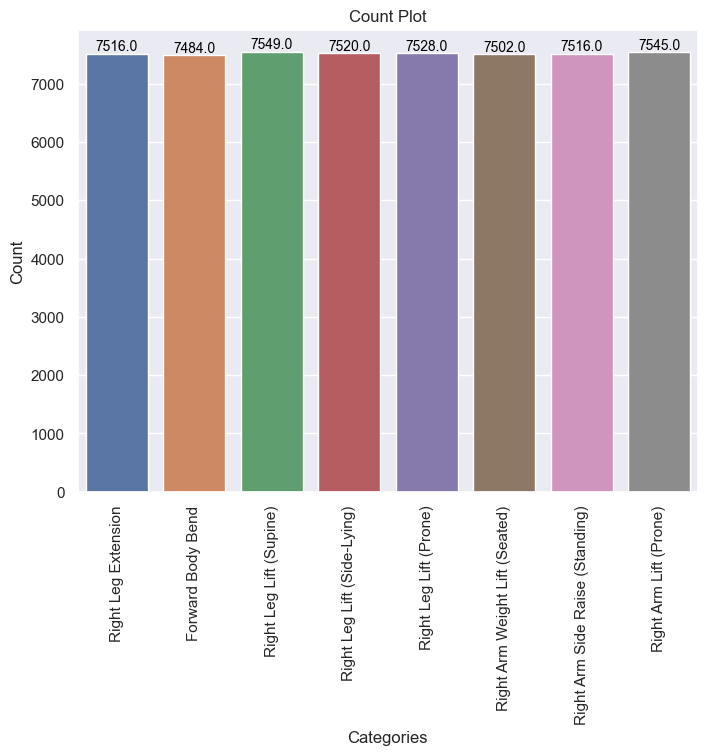

In [11]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.countplot(x='Exercise', data=dataset)
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)

plt.show()  # Display the plot

In [12]:
# Converting object type to int type

In [13]:
le= LabelEncoder()
dataset['Exercise']=  le.fit_transform(dataset['Exercise'])

In [14]:
#Defining Dependent and independent variables

In [15]:
X=dataset.iloc[:,0:9]

In [16]:
X

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,-9.685645,-1.645149,0.505022,-0.020696,0.009202,-0.008566,0.589728,0.453403,-0.075234
1,-9.648184,-1.645353,0.513125,-0.008165,-0.001407,-0.003256,0.587024,0.453644,-0.075593
2,-9.700570,-1.615223,0.512321,-0.004447,0.011059,-0.008589,0.589691,0.454598,-0.075525
3,-9.685627,-1.630183,0.497591,-0.026110,0.009183,-0.008554,0.589240,0.452864,-0.074705
4,-9.655697,-1.630194,0.460742,-0.008109,0.001231,-0.005950,0.589647,0.452882,-0.076429
...,...,...,...,...,...,...,...,...,...
60155,1.860534,3.676934,-8.853477,0.010695,-0.002413,-0.000222,0.173311,-0.505069,0.510362
60156,1.850761,3.696431,-8.863746,-0.000831,-0.015307,-0.002912,0.174615,-0.504988,0.510559
60157,1.867795,3.701164,-8.844007,0.002504,0.001337,0.006846,0.172888,-0.505046,0.509691
60158,1.860530,3.696429,-8.888052,0.000726,0.004969,0.006849,0.172437,-0.505574,0.510979


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
#X_test=sc.fit_transform(X_test)

In [18]:
y=dataset.iloc[:,-1]

In [19]:
y

0        4
1        4
2        4
3        4
4        4
        ..
60155    3
60156    3
60157    3
60158    3
60159    3
Name: Exercise, Length: 60160, dtype: int32

In [20]:
#Datasplitting

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=44)

In [22]:
X_train.shape

(42112, 9)

In [23]:
X_test.shape

(18048, 9)

In [24]:
X_train.shape

(42112, 9)

In [25]:
X_test.shape

(18048, 9)

In [26]:
#Building a ML Model

In [27]:
labels=['Right Leg Extension', 'Forward Body Bend',
       'Right Leg Lift (Supine)', 'Right Leg Lift (Side-Lying)',
       'Right Leg Lift (Prone)', 'Right Arm Weight Lift (Seated)',
       'Right Arm Side Raise (Standing)', 'Right Arm\xa0Lift\xa0(Prone)']

In [28]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [29]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# AdaboostClassifier

Model loaded successfully.
AdaBoostClassifier Accuracy    : 24.911347517730498
AdaBoostClassifier Precision   : 25.087791318542564
AdaBoostClassifier Recall      : 25.44019788952759
AdaBoostClassifier FSCORE      : 16.864608738591343

 AdaBoostClassifier classification report
                                  precision    recall  f1-score   support

            Right Leg Extension       0.95      0.19      0.32      2200
              Forward Body Bend       0.00      0.00      0.00      2297
        Right Leg Lift (Supine)       0.00      0.00      0.00      2283
    Right Leg Lift (Side-Lying)       0.58      0.20      0.30      2327
         Right Leg Lift (Prone)       0.00      0.00      0.00      2246
 Right Arm Weight Lift (Seated)       0.33      0.61      0.43      2180
Right Arm Side Raise (Standing)       0.00      0.00      0.00      2248
         Right Arm Lift (Prone)       0.18      1.00      0.30      2267

                       accuracy                           0.25 

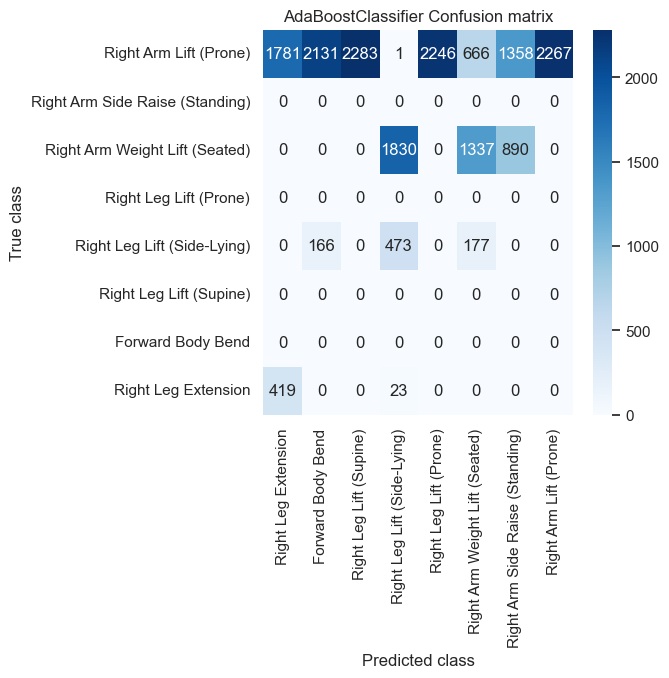

In [30]:
if os.path.exists('AdaboostClassifier.pkl'):
    # Load the trained model from the file
    clf = joblib.load('AdaBoostClassifier.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("AdaBoostClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'AdaBoostClassifier.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("AdaBoostClassifier", predict, y_test)

# Support Vector Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

Model saved successfully.
SVC_model Accuracy    : 93.3344414893617
SVC_model Precision   : 93.28436872248838
SVC_model Recall      : 93.69064119492907
SVC_model FSCORE      : 93.42872066583539

 SVC_model classification report
                                  precision    recall  f1-score   support

            Right Leg Extension       1.00      0.98      0.99      2200
              Forward Body Bend       1.00      1.00      1.00      2297
        Right Leg Lift (Supine)       0.98      1.00      0.99      2283
    Right Leg Lift (Side-Lying)       1.00      1.00      1.00      2327
         Right Leg Lift (Prone)       0.79      0.81      0.80      2246
 Right Arm Weight Lift (Seated)       1.00      0.89      0.94      2180
Right Arm Side Raise (Standing)       1.00      1.00      1.00      2248
         Right Arm Lift (Prone)       0.73      0.79      0.76      2267

                       accuracy                           0.93     18048
                      macro avg       0.

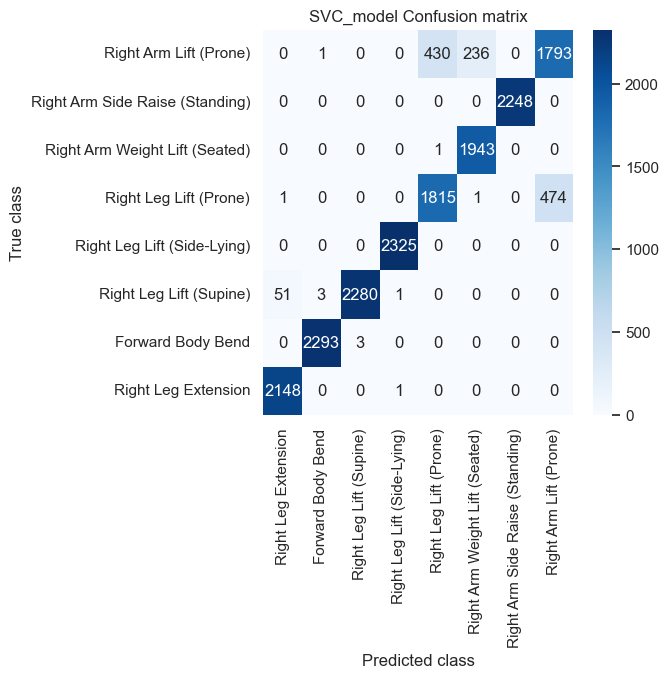

In [32]:
# Check if the model files exist
if os.path.exists('SVC_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('SVC_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("SVC_model", predict, y_test)
else:
    clf = SVC(C=1.0,kernel='poly',degree=5,gamma='scale')
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'SVC_model.pkl') 
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("SVC_model", predict, y_test)

In [33]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["AdaboostClassifier",'Support Vector Classifier']
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,AdaboostClassifier,25.087791,25.440198,16.864609,24.911348
1,Support Vector Classifier,93.284369,93.690641,93.428721,93.334441


In [34]:
# prediction

In [45]:
test=pd.read_csv("test.csv")

In [46]:
test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,-9.685645,-1.645149,0.505022,-0.020696,0.009202,-0.008566,0.589728,0.453403,-0.075234
1,-9.648184,-1.645353,0.513125,-0.008165,-0.001407,-0.003256,0.587024,0.453644,-0.075593
2,-9.700570,-1.615223,0.512321,-0.004447,0.011059,-0.008589,0.589691,0.454598,-0.075525
3,-9.685627,-1.630183,0.497591,-0.026110,0.009183,-0.008554,0.589240,0.452864,-0.074705
4,-9.655697,-1.630194,0.460742,-0.008109,0.001231,-0.005950,0.589647,0.452882,-0.076429
5,-8.785363,3.917636,-2.010537,-0.008101,0.001466,-0.005282,0.738027,0.088319,0.234350
6,-8.800332,3.917655,-1.995846,-0.019871,0.006878,-0.001592,0.738883,0.088730,0.234917
7,-8.815302,3.917674,-1.981154,-0.005378,0.017653,-0.003359,0.738904,0.088878,0.233413
8,-8.815270,3.932589,-1.973641,-0.008063,0.017606,-0.005162,0.738914,0.088051,0.235204
9,0.366069,-9.632295,-1.249400,-0.014018,0.006940,-0.004262,-0.513750,0.600978,0.064607


In [47]:
scaled_test=sc.fit_transform(test)

In [49]:
# Make predictions on the selected test data
predict = clf.predict(scaled_test)

# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    print(test.iloc[i])  # Print the row
    print(f"Row {i}:************************************************** {labels[p]}")

acc_x   -9.685645
acc_y   -1.645149
acc_z    0.505022
gyr_x   -0.020696
gyr_y    0.009202
gyr_z   -0.008566
mag_x    0.589728
mag_y    0.453403
mag_z   -0.075234
Name: 0, dtype: float64
Row 0:************************************************** Right Leg Lift (Supine)
acc_x   -9.648184
acc_y   -1.645353
acc_z    0.513125
gyr_x   -0.008165
gyr_y   -0.001407
gyr_z   -0.003256
mag_x    0.587024
mag_y    0.453644
mag_z   -0.075593
Name: 1, dtype: float64
Row 1:************************************************** Right Arm Weight Lift (Seated)
acc_x   -9.700570
acc_y   -1.615223
acc_z    0.512321
gyr_x   -0.004447
gyr_y    0.011059
gyr_z   -0.008589
mag_x    0.589691
mag_y    0.454598
mag_z   -0.075525
Name: 2, dtype: float64
Row 2:************************************************** Right Leg Lift (Supine)
acc_x   -9.685627
acc_y   -1.630183
acc_z    0.497591
gyr_x   -0.026110
gyr_y    0.009183
gyr_z   -0.008554
mag_x    0.589240
mag_y    0.452864
mag_z   -0.074705
Name: 3, dtype: float64
Row 3:

In [50]:
test['predict']=predict

In [51]:
test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,predict
0,-9.685645,-1.645149,0.505022,-0.020696,0.009202,-0.008566,0.589728,0.453403,-0.075234,2
1,-9.648184,-1.645353,0.513125,-0.008165,-0.001407,-0.003256,0.587024,0.453644,-0.075593,5
2,-9.700570,-1.615223,0.512321,-0.004447,0.011059,-0.008589,0.589691,0.454598,-0.075525,2
3,-9.685627,-1.630183,0.497591,-0.026110,0.009183,-0.008554,0.589240,0.452864,-0.074705,2
4,-9.655697,-1.630194,0.460742,-0.008109,0.001231,-0.005950,0.589647,0.452882,-0.076429,5
5,-8.785363,3.917636,-2.010537,-0.008101,0.001466,-0.005282,0.738027,0.088319,0.234350,0
6,-8.800332,3.917655,-1.995846,-0.019871,0.006878,-0.001592,0.738883,0.088730,0.234917,0
7,-8.815302,3.917674,-1.981154,-0.005378,0.017653,-0.003359,0.738904,0.088878,0.233413,0
8,-8.815270,3.932589,-1.973641,-0.008063,0.017606,-0.005162,0.738914,0.088051,0.235204,0
9,0.366069,-9.632295,-1.249400,-0.014018,0.006940,-0.004262,-0.513750,0.600978,0.064607,7


In [53]:
test['Predicted'] = [labels[p] for p in predict]

In [54]:
test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,predict,Predicted
0,-9.685645,-1.645149,0.505022,-0.020696,0.009202,-0.008566,0.589728,0.453403,-0.075234,2,Right Leg Lift (Supine)
1,-9.648184,-1.645353,0.513125,-0.008165,-0.001407,-0.003256,0.587024,0.453644,-0.075593,5,Right Arm Weight Lift (Seated)
2,-9.700570,-1.615223,0.512321,-0.004447,0.011059,-0.008589,0.589691,0.454598,-0.075525,2,Right Leg Lift (Supine)
3,-9.685627,-1.630183,0.497591,-0.026110,0.009183,-0.008554,0.589240,0.452864,-0.074705,2,Right Leg Lift (Supine)
4,-9.655697,-1.630194,0.460742,-0.008109,0.001231,-0.005950,0.589647,0.452882,-0.076429,5,Right Arm Weight Lift (Seated)
5,-8.785363,3.917636,-2.010537,-0.008101,0.001466,-0.005282,0.738027,0.088319,0.234350,0,Right Leg Extension
6,-8.800332,3.917655,-1.995846,-0.019871,0.006878,-0.001592,0.738883,0.088730,0.234917,0,Right Leg Extension
7,-8.815302,3.917674,-1.981154,-0.005378,0.017653,-0.003359,0.738904,0.088878,0.233413,0,Right Leg Extension
8,-8.815270,3.932589,-1.973641,-0.008063,0.017606,-0.005162,0.738914,0.088051,0.235204,0,Right Leg Extension
9,0.366069,-9.632295,-1.249400,-0.014018,0.006940,-0.004262,-0.513750,0.600978,0.064607,7,Right Arm Lift (Prone)
